<a href="https://colab.research.google.com/github/FrancescoMinchio/Final_Assignement/blob/main/FINAL_Assignement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL_ASSIGNEMENT

*   Student name: Francesco Minchio
*   Student contact: francesco.minchio@studenti.unitn.it
*   Student referal: 225269


## INTRODUCTION

*   Library: Pytorch
*   Data set: Tensors (containers that may contain data in N dimensions)


### **Neural Network**

##### Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input. The patterns they recognize are numerical, contained in vectors, into which all real-world data, be it images, sound, text or time series, must be translated.

### **FNN (Vanilla Neural Network)**

##### Deep feedforward networks, also often called feedforward neural networks, or multilayer perceptrons(MLPs), have the most simple architecture in the Neural Networks realm and they are the quintessential deep learning models. The goal of a feedforward network is to approximate some function f* . For example, for a classiﬁer, y = f*(x) maps an input x to a category y. In this Neural Network the hidden layers gradually increase/decrease in hidden size (number of neurons) so more and more details of the input (images, text etc.) can be grasped.


### **The Perceptron**

##### A Perceptron is a single layer neural network, while a Multi Layer Perceptron is called a Neural Network.

### **Functionality**

Our network is trained to receive an B&W image and create the output 1 if the image is a cat and 0 otherwise. Therefore, the FNN Vanilla is a Classifier.



*   INPUT: one image (3 channels)
*   OUTPUT: 1 neuron which fires the value 1 if the image is a cat or 0 otherwise.
*   Layer 1: vector size [200]
*   Layer 2: neurons [300]
*   Layer 3: neurons [400]









## CODE

##### Library implementation and tensor creation (x, y, z).

In [27]:
import torch
import torch.nn as nn                                # build the NN              
import torch.nn.functional as F                      # activation functions
from torchvision import datasets, transforms         # MNIST dataset
import torch.optim as optim                          # optimizer

import numpy as np
import matplotlib.pyplot as plt                      # plotting
%matplotlib inline
import seaborn as sns
import sklearn.metrics


x = torch.empty(5, 3)                                # tensor_1
print(x, '\n')
y = torch.ones(5, 3, dtype=torch.long)               # tensor_2
print(y, '\n')
z = torch.tensor([[0, 1, 2], [3, 4, 5]])             # tensor_3
print(z)

tensor([[-2.4734e+27,  3.0747e-41,  1.3593e-43],
        [ 1.5975e-43,  1.5414e-43,  1.4714e-43],
        [ 1.5414e-43,  1.4433e-43,  1.3312e-43],
        [ 1.5975e-43,  1.3593e-43,  1.6255e-43],
        [ 1.4153e-43,  0.0000e+00, -5.0246e+24]]) 

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]) 

tensor([[0, 1, 2],
        [3, 4, 5]])


##### We implement MNIST to load in the data from torchvision datasets and then return train=True to access training images and train=False to access test images. We also transform to Tensors the images

Train data: Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() 

Test data: Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor() 

Image on index 0 shape: torch.Size([1, 28, 28])
Image on index 0 label: 5


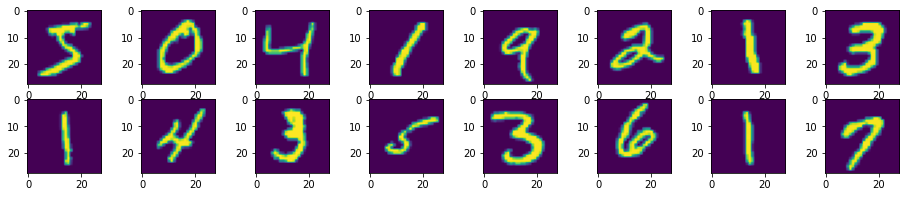

In [28]:
mnist_train = datasets.MNIST('data', train = True, download = True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST('data', train = False, download = True, transform=transforms.ToTensor())

print('Train data:', mnist_train, '\n')
print('Test data:', mnist_test, '\n')
print('Image on index 0 shape:', list(mnist_train)[0][0].shape)
print('Image on index 0 label:', list(mnist_train)[0][1])

sample = datasets.MNIST('data', train=True, download=True)

# Check images
plt.figure(figsize = (16, 3))
for k, (image, label) in enumerate(sample):
    if k >= 16:
        break
    plt.subplot(2, 8, k+1)
    plt.imshow(image)

### **Vanilla FNN**

When we work with neural networks you need to define a class, we ignore prints. In addition, the super() function exists because the Mnistclassifier class inherits attributes from its parent class nn.Module (subclass).



*   Layer_1 creation: from 784 neurons to 50
*   Layer_2 creation: from 50 neurons to 20
*   Layer_3 creation: from 20 neurons to 10



> 





*   10 = categories of numbers from which we need to pick 1
*   ReLu = Activation Function which says that we are making the output of each neuron nonlinear, because we want to learn non-linear relationships between the input and the output


    








In [29]:
class MNISTClassifier(nn.Module):                    
    def __init__(self):                                     # structure
        super(MNISTClassifier, self).__init__()             
        self.layers = nn.Sequential(nn.Linear(28*28, 50),   # Layer_1
                                    nn.ReLU(),              
                                    nn.Linear(50, 20),      # Layer_2
                                    nn.ReLU(),              
                                    nn.Linear(20, 10))      # Layer_3
                   
    def forward(self, image, prints=False):                 # Taking the image though the FNN
        if prints: print('Image shape:', image.shape)
        image = image.view(-1, 28*28)                       # Flatten image: from [1, 28, 28] to [784]
        if prints: print('Image reshaped:', image.shape)
        out = self.layers(image)                            # Create Log Probabilities
        if prints: print('Out shape:', out.shape)
        
        return out

In [30]:
# Making a Forward Pass
torch.manual_seed(1)                                        # set the random seed
np.random.seed(1)                                           #set random seed in numpy

# Selecting 1 image with its label
image_example, label_example = mnist_train[0]
print('Image shape:', image_example.shape)
print('Label:', label_example, '\n')

# Creating an instance of the model
model_example = MNISTClassifier()
print(model_example, '\n')

# Creating the log probabilities
out = model_example(image_example, prints=True)
print('out:', out, '\n')

# Choose maximum probability and then select only the label
prediction = out.max(dim=1)[1]
print('prediction:', prediction)

Image shape: torch.Size([1, 28, 28])
Label: 5 

MNISTClassifier(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=10, bias=True)
  )
) 

Image shape: torch.Size([1, 28, 28])
Image reshaped: torch.Size([1, 784])
Out shape: torch.Size([1, 10])
out: tensor([[-0.0371,  0.2867, -0.0227,  0.1967,  0.1084,  0.0576, -0.0036, -0.0246,
         -0.2160,  0.1166]], grad_fn=<AddmmBackward>) 

prediction: tensor([1])


### **Applying the Backpropagation**

##### Update the weights and biases in the neural network so it learns to recognize the digits and accurately classify them.

We create LOSS and OPTIMIZER instances:


*   LOSS: how far is the prediction from the true value

By using these two we computes the gradients of each neuron and updates the weights and after 1 iteration the weights have updated once.





In [31]:
criterion = nn.CrossEntropyLoss()
print('Criterion:', criterion, '\n')


optimizer = optim.SGD(model_example.parameters(), lr=0.005, momentum=0.9)
print('Optimizer:', optimizer)

# Parameter Understanding
for i in range(6):
    print(i+1, ':', list(model_example.parameters())[i].shape)

torch.manual_seed(1) 
np.random.seed(1)

print('Log Probabilities:', out)
print('Actual value:', torch.tensor(label_example).reshape(-1))

# Clear gradients
optimizer.zero_grad()
# Compute loss
loss = criterion(out, torch.tensor(label_example).reshape(-1))
print('Loss:', loss)
# Compute Gradients
loss.backward()
# Update weights
optimizer.step()


Criterion: CrossEntropyLoss() 

Optimizer: SGD (
Parameter Group 0
    dampening: 0
    lr: 0.005
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
1 : torch.Size([50, 784])
2 : torch.Size([50])
3 : torch.Size([20, 50])
4 : torch.Size([20])
5 : torch.Size([10, 20])
6 : torch.Size([10])
Log Probabilities: tensor([[-0.0371,  0.2867, -0.0227,  0.1967,  0.1084,  0.0576, -0.0036, -0.0246,
         -0.2160,  0.1166]], grad_fn=<AddmmBackward>)
Actual value: tensor([5])
Loss: tensor(2.3000, grad_fn=<NllLossBackward>)


### **Applying the Training**

##### We can compute the average loss across a mini-batch of multiple images, and take a step to optimize the average loss. The average loss across multiple training inputs is going to be less "noisy" than the loss for a single input, and is less likely to provide "bad information" because of a "bad" input. The actual  that we choose depends on many things. We want our batch size to be large enough to not be too "noisy", but not so large as to make each iteration too expensive to run.

In [32]:

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=60, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=10, shuffle=True)

# Inspect Trainloader
print('trainloader object:', train_loader, '\n')

# Select Batch
imgs, labels = next(iter(train_loader))

print('Object shape:', imgs.shape)      # [60, 1, 28, 28]: 60 images of size [1, 28, 28]
print('Label values:', labels)          # actual labels for the 60 images
print('Total Inages:', labels.shape)    # 60 labels in total

torch.manual_seed(1) 
np.random.seed(1) 

n = 0
for k, (images, labels) in enumerate(train_loader):
    if k >= 3:
        break
    
    print('========== Batch', k, ':')
    # Prediction:
    out = model_example(images)
    print('out shape:', out.shape)
    
    # Update parameters
    loss = criterion(out, labels)
    print('loss:', loss)
    
    print('Optimizing...')
    # Computes the gradient of current tensor
    loss.backward()
    # Performs a single optimization step
    optimizer.step()
    # Clears the gradients of all optimized
    optimizer.zero_grad()
    print('Done.')    
    
    if k<2: print('\n')

trainloader object: <torch.utils.data.dataloader.DataLoader object at 0x7f9fd234f1d0> 

Object shape: torch.Size([60, 1, 28, 28])
Label values: tensor([4, 8, 8, 6, 7, 1, 0, 7, 1, 8, 7, 6, 4, 9, 1, 5, 3, 2, 6, 8, 8, 6, 9, 4,
        6, 0, 4, 2, 6, 7, 0, 5, 8, 6, 0, 3, 5, 7, 4, 7, 5, 1, 6, 7, 3, 6, 0, 3,
        1, 1, 2, 6, 7, 9, 8, 0, 7, 2, 4, 3])
Total Inages: torch.Size([60])
========== Batch 0 :
out shape: torch.Size([60, 10])
loss: tensor(2.3260, grad_fn=<NllLossBackward>)
Optimizing...
Done.


========== Batch 1 :
out shape: torch.Size([60, 10])
loss: tensor(2.3179, grad_fn=<NllLossBackward>)
Optimizing...
Done.


========== Batch 2 :
out shape: torch.Size([60, 10])
loss: tensor(2.2919, grad_fn=<NllLossBackward>)
Optimizing...
Done.


### **Accuracy**

In [33]:
correct_cases = 0
total_cases = 0
model_example.eval()

for k, (images, labels) in enumerate(train_loader):
    if k >= 3: break
    
    print('==========', k, ':')
    out = model_example(images)
    print('Out:', out.shape)
    
    # maximum probability 
    prediction = out.max(dim = 1)[1]
    print('Prediction:', prediction.shape)
    
    # Number of correct cases - we first see how many are correct in the batch
            # then we sum, then convert to integer (not tensor)
    correct_cases += (prediction == labels).sum().item()
    print('Correct:', correct_cases)
    
    # Total cases
    total_cases += images.shape[0]
    print('Total:', total_cases)  
    
    if k < 2: print('\n')
        

print('Average Accuracy after 3 iterations:', correct_cases/total_cases)

def get_accuracy(model, data, batchSize = 20):
    '''Iterates through data and returnes average accuracy per batch.'''
    # Sets the model in evaluation mode
    model.eval()
    
    # Creates the dataloader
    data_loader = torch.utils.data.DataLoader(data, batch_size=batchSize)
    
    correct_cases = 0
    total_cases = 0
    
    for (images, labels) in iter(data_loader):
        # Is formed by 20 images (by default) with 10 probabilities each
        out = model(images)
        # Choose maximum probability and then select only the label (not the prob number)
        prediction = out.max(dim = 1)[1]
        # First check how many are correct in the batch, then we sum then convert to integer (not tensor)
        correct_cases += (prediction == labels).sum().item()
        # Total cases
        total_cases += images.shape[0]
    
    return correct_cases / total_cases

========== 0 :
Out: torch.Size([60, 10])
Prediction: torch.Size([60])
Correct: 6
Total: 60


========== 1 :
Out: torch.Size([60, 10])
Prediction: torch.Size([60])
Correct: 9
Total: 120


========== 2 :
Out: torch.Size([60, 10])
Prediction: torch.Size([60])
Correct: 16
Total: 180
Average Accuracy after 3 iterations: 0.08888888888888889


### **Predefined Training Function**

In [34]:
def train_network(model, train_data, test_data, batchSize=20, num_epochs=1, learning_rate=0.01, weight_decay=0,
                 show_plot = True, show_acc = True):
    
    
    print('Get data ready...')
    # Create dataloader (multiple batches)
    train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batchSize, shuffle=True)
    
    # Create criterion and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=weight_decay)
    
    # Losses & Iterations
    losses = []
    iterations = []
    # Train and test accuracies
    train_acc = []
    test_acc = []
    
    print('Training started...')
    iteration = 0
    # Train the data multiple times
    for epoch in range(num_epochs):
      for images, labels in iter(train_loader):
            # Set model in training mode:
            model.train()
            
            # Create log probabilities
            out = model(images)
            # Clears the gradients from previous iteration
            optimizer.zero_grad()
            # Computes loss
            loss = criterion(out, labels)
            # Computes gradients for neurons
            loss.backward()
            # Updates the weights
            optimizer.step()
            
            # Save information 
            iterations.append(iteration)
            iteration += 1
            losses.append(loss)
            # Compute accuracy and save
            train_acc.append(get_accuracy(model, train_data))
            test_acc.append(get_accuracy(model, test_data))
    # Show Accuracies
    if show_acc:
        print("Final Training Accuracy: {}".format(train_acc[-1]))
        print("Final Testing Accuracy: {}".format(test_acc[-1]))
    
    # Create plots
    if show_plot:
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        plt.title("Loss Curve")
        plt.plot(iterations[::20], losses[::20], label="Train", linewidth=4, color='#008C76FF')
        plt.xlabel("Iterations")
        plt.ylabel("Loss")

        plt.subplot(1,2,2)
        plt.title("Accuracy Curve")
        plt.plot(iterations[::20], train_acc[::20], label="Train", linewidth=4, color='#9ED9CCFF')
        plt.plot(iterations[::20], test_acc[::20], label="Test", linewidth=4, color='#FAA094FF')
        plt.xlabel("Iterations")
        plt.ylabel("Accuracy")
        plt.legend(loc='best')
        plt.show()

### **Model Evaluation**



*   500 training images and 500 testing images
*   We iterate through the data 200 times (num_epochs=200)
*   20 images/batch






Get data ready...
Training started...
Final Training Accuracy: 1.0
Final Testing Accuracy: 0.784


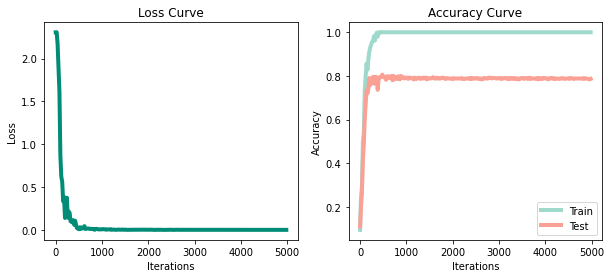

In [35]:
mnist_data = datasets.MNIST('data', train = True, download=True, transform=transforms.ToTensor())
mnist_data = list(mnist_data)

# Training and Testing
mnist_train = mnist_data[:500]     # 500 training images
mnist_test = mnist_data[500:1000]  # 500 test images

# Create Model Instance
model1 = MNISTClassifier()

# Train
train_network(model1, mnist_train, mnist_test, num_epochs=200)